In [1]:
# Imports
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.pipeline import make_pipeline
import warnings

warnings.simplefilter('ignore')

# 1) Load the data file and explore the data, showing size, and data distributions .

In [2]:
df = pd.read_csv('income.csv', index_col=0)
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")
df.describe()

The dataset has 7891 rows and 10 columns


,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
count,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7.891000e+03
mean,0.436320,1503.934989,682.607528,1514.311367,1141.186668,112.176403,85.558738,39.987961,1.094664e+08
std,7.708889,8019.878927,3173.115435,6818.879697,7609.469415,1152.192290,978.254230,588.108958,7.821773e+08
min,0.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.388280e+05
25%,0.000000,226.000000,109.000000,207.000000,112.000000,7.000000,4.000000,0.000000,1.193600e+07
50%,0.000000,525.000000,253.000000,520.000000,309.000000,21.000000,14.000000,5.000000,3.099277e+07
75%,0.000000,1256.000000,600.000000,1347.000000,876.500000,68.000000,46.000000,20.000000,8.517508e+07
max,456.000000,540724.000000,205064.000000,413523.000000,520285.000000,78473.000000,66290.000000,35644.000000,5.130494e+10


In [3]:
df

,Territorio,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
0,Abano Terme,0.0,3641.0,1997.0,4567.0,3268.0,413.0,400.0,177.0,347774542.0
1,Abbadia Cerreto,0.0,50.0,29.0,73.0,41.0,0.0,0.0,0.0,3399810.0
2,Abbadia Lariana,0.0,511.0,276.0,792.0,656.0,78.0,48.0,31.0,59153455.0
3,Abbadia San Salvatore,0.0,1303.0,783.0,1820.0,754.0,69.0,33.0,13.0,87615654.0
4,Abbasanta,0.0,577.0,194.0,443.0,430.0,26.0,13.0,0.0,30992769.0
...,...,...,...,...,...,...,...,...,...,...
7886,Zuglio,0.0,126.0,60.0,163.0,87.0,6.0,0.0,4.0,8935126.0
7887,Zumaglia,0.0,155.0,104.0,295.0,151.0,16.0,13.0,4.0,15908371.0
7888,Zumpano,0.0,645.0,277.0,374.0,188.0,6.0,5.0,0.0,21065448.0
7889,Zungoli,0.0,350.0,163.0,138.0,62.0,4.0,4.0,0.0,8774861.0


In [4]:
# sns.pairplot(df)

# 2) drop the columns that are not relevant for the clustering operation, if any, and explain why you do that.

In [5]:
# Discard 'Territorio' because it's categorical and doesn't play a role in clustering
X = df.drop('Territorio', axis=1)
y = df['Territorio']

# 3) find the best clustering scheme and compute: 
a) the quality indexes usual for clustering 

b) the size of the clusters

In [6]:
# Use KMeans
k_range = range(2, 11)
random_state = 42

inertia_scores = []
silhouette_scores = []

for k in k_range :
    km = KMeans(random_state=random_state, n_clusters=k)
    y_km = km.fit_predict(X)

    silhouette_scores.append(silhouette_score(X, y_km))
    inertia_scores.append(km.inertia_)
    

(0.0, 1.0)

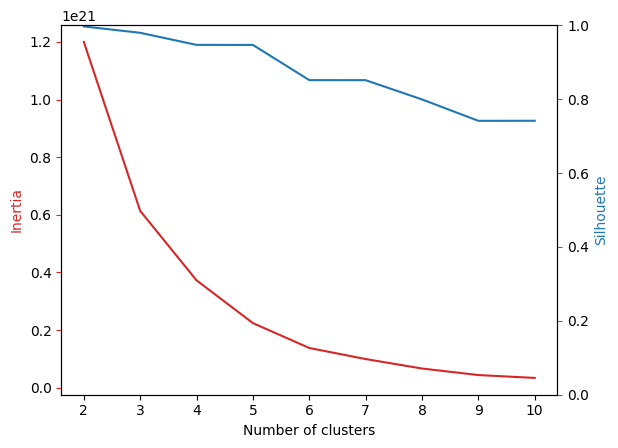

In [7]:
# Plot them
fig, ax1 = plt.subplots()

color='tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.tick_params('y', color=color)
ax1.plot(k_range, inertia_scores, color=color)

ax2 = ax1.twinx()

color='tab:blue'
ax2.set_ylabel('Silhouette', color=color)
ax2.tick_params('y', color=color)
ax2.plot(k_range, silhouette_scores, color=color)
ax2.set_ylim(0,1)


We can see that there's an elbow of inertia curve in K=3 and in the same point we have one of the highest inertia so we'll continue with 3 clusters.

In [8]:
k_best = 3
km = KMeans(n_clusters=k_best, random_state=random_state)
y_km = km.fit_predict(X)

# Quality indexes
print(f"The silhouette index is {silhouette_score(X, y_km)}")
print(f"The inertia index is {km.inertia_}")

# Size of clusters
clusters, sizes = np.unique(y_km, return_counts=True)
print("\nSize of clusters:")
for i in range(len(clusters)) :
    print(f"Cluster: {clusters[i]}:\t{sizes[i] / len(y_km) * 100 :.2f}%")


The silhouette index is 0.9791953549748942
The inertia index is 6.135969483538234e+20

Size of clusters:
Cluster: 0:	99.80%
Cluster: 1:	0.03%
Cluster: 2:	0.18%


# 4) apply a data transformation using the preprocessor below 

In [9]:
preprocessor = make_pipeline(
    StandardScaler(with_std=False),
    PowerTransformer(standardize=True),
)

X_p = pd.DataFrame(preprocessor.fit_transform(X), columns=X.columns)

# 5) find the best clustering scheme for the transformed data, as done in step 3 . 

In [10]:
# Use KMeans
k_range = range(2, 11)
random_state = 42

inertia_scores = []
silhouette_scores = []

for k in k_range :
    km = KMeans(random_state=random_state, n_clusters=k)
    y_p_km = km.fit_predict(X_p)

    silhouette_scores.append(silhouette_score(X_p, y_p_km))
    inertia_scores.append(km.inertia_)

(0.0, 1.0)

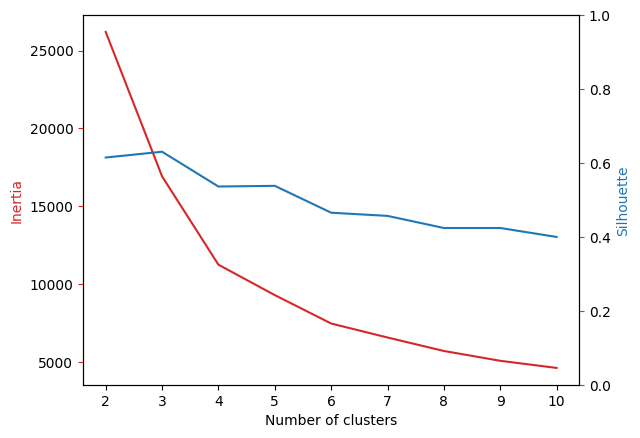

In [11]:
# Plot them
fig, ax1 = plt.subplots()

color='tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.tick_params('y', color=color)
ax1.plot(k_range, inertia_scores, color=color)

ax2 = ax1.twinx()

color='tab:blue'
ax2.set_ylabel('Silhouette', color=color)
ax2.tick_params('y', color=color)
ax2.plot(k_range, silhouette_scores, color=color)
ax2.set_ylim(0,1)


In [12]:
k_best = 3
km = KMeans(n_clusters=k_best, random_state=random_state)
y_p_km = km.fit_predict(X_p)

# Quality indexes
print(f"The silhouette index is {silhouette_score(X_p, y_p_km)}")
print(f"The inertia index is {km.inertia_}")

# Size of clusters
clusters, sizes = np.unique(y_p_km, return_counts=True)
print("\nSize of clusters:")
for i in range(len(clusters)) :
    print(f"Cluster: {clusters[i]}:\t{sizes[i] / len(y_p_km) * 100 :.2f}%")


The silhouette index is 0.6303958689653107
The inertia index is 16920.527564356104

Size of clusters:
Cluster: 0:	32.19%
Cluster: 1:	64.53%
Cluster: 2:	3.28%


# 6) show together the results of the two clustering schemes obtained and comment which of the two is better and why.

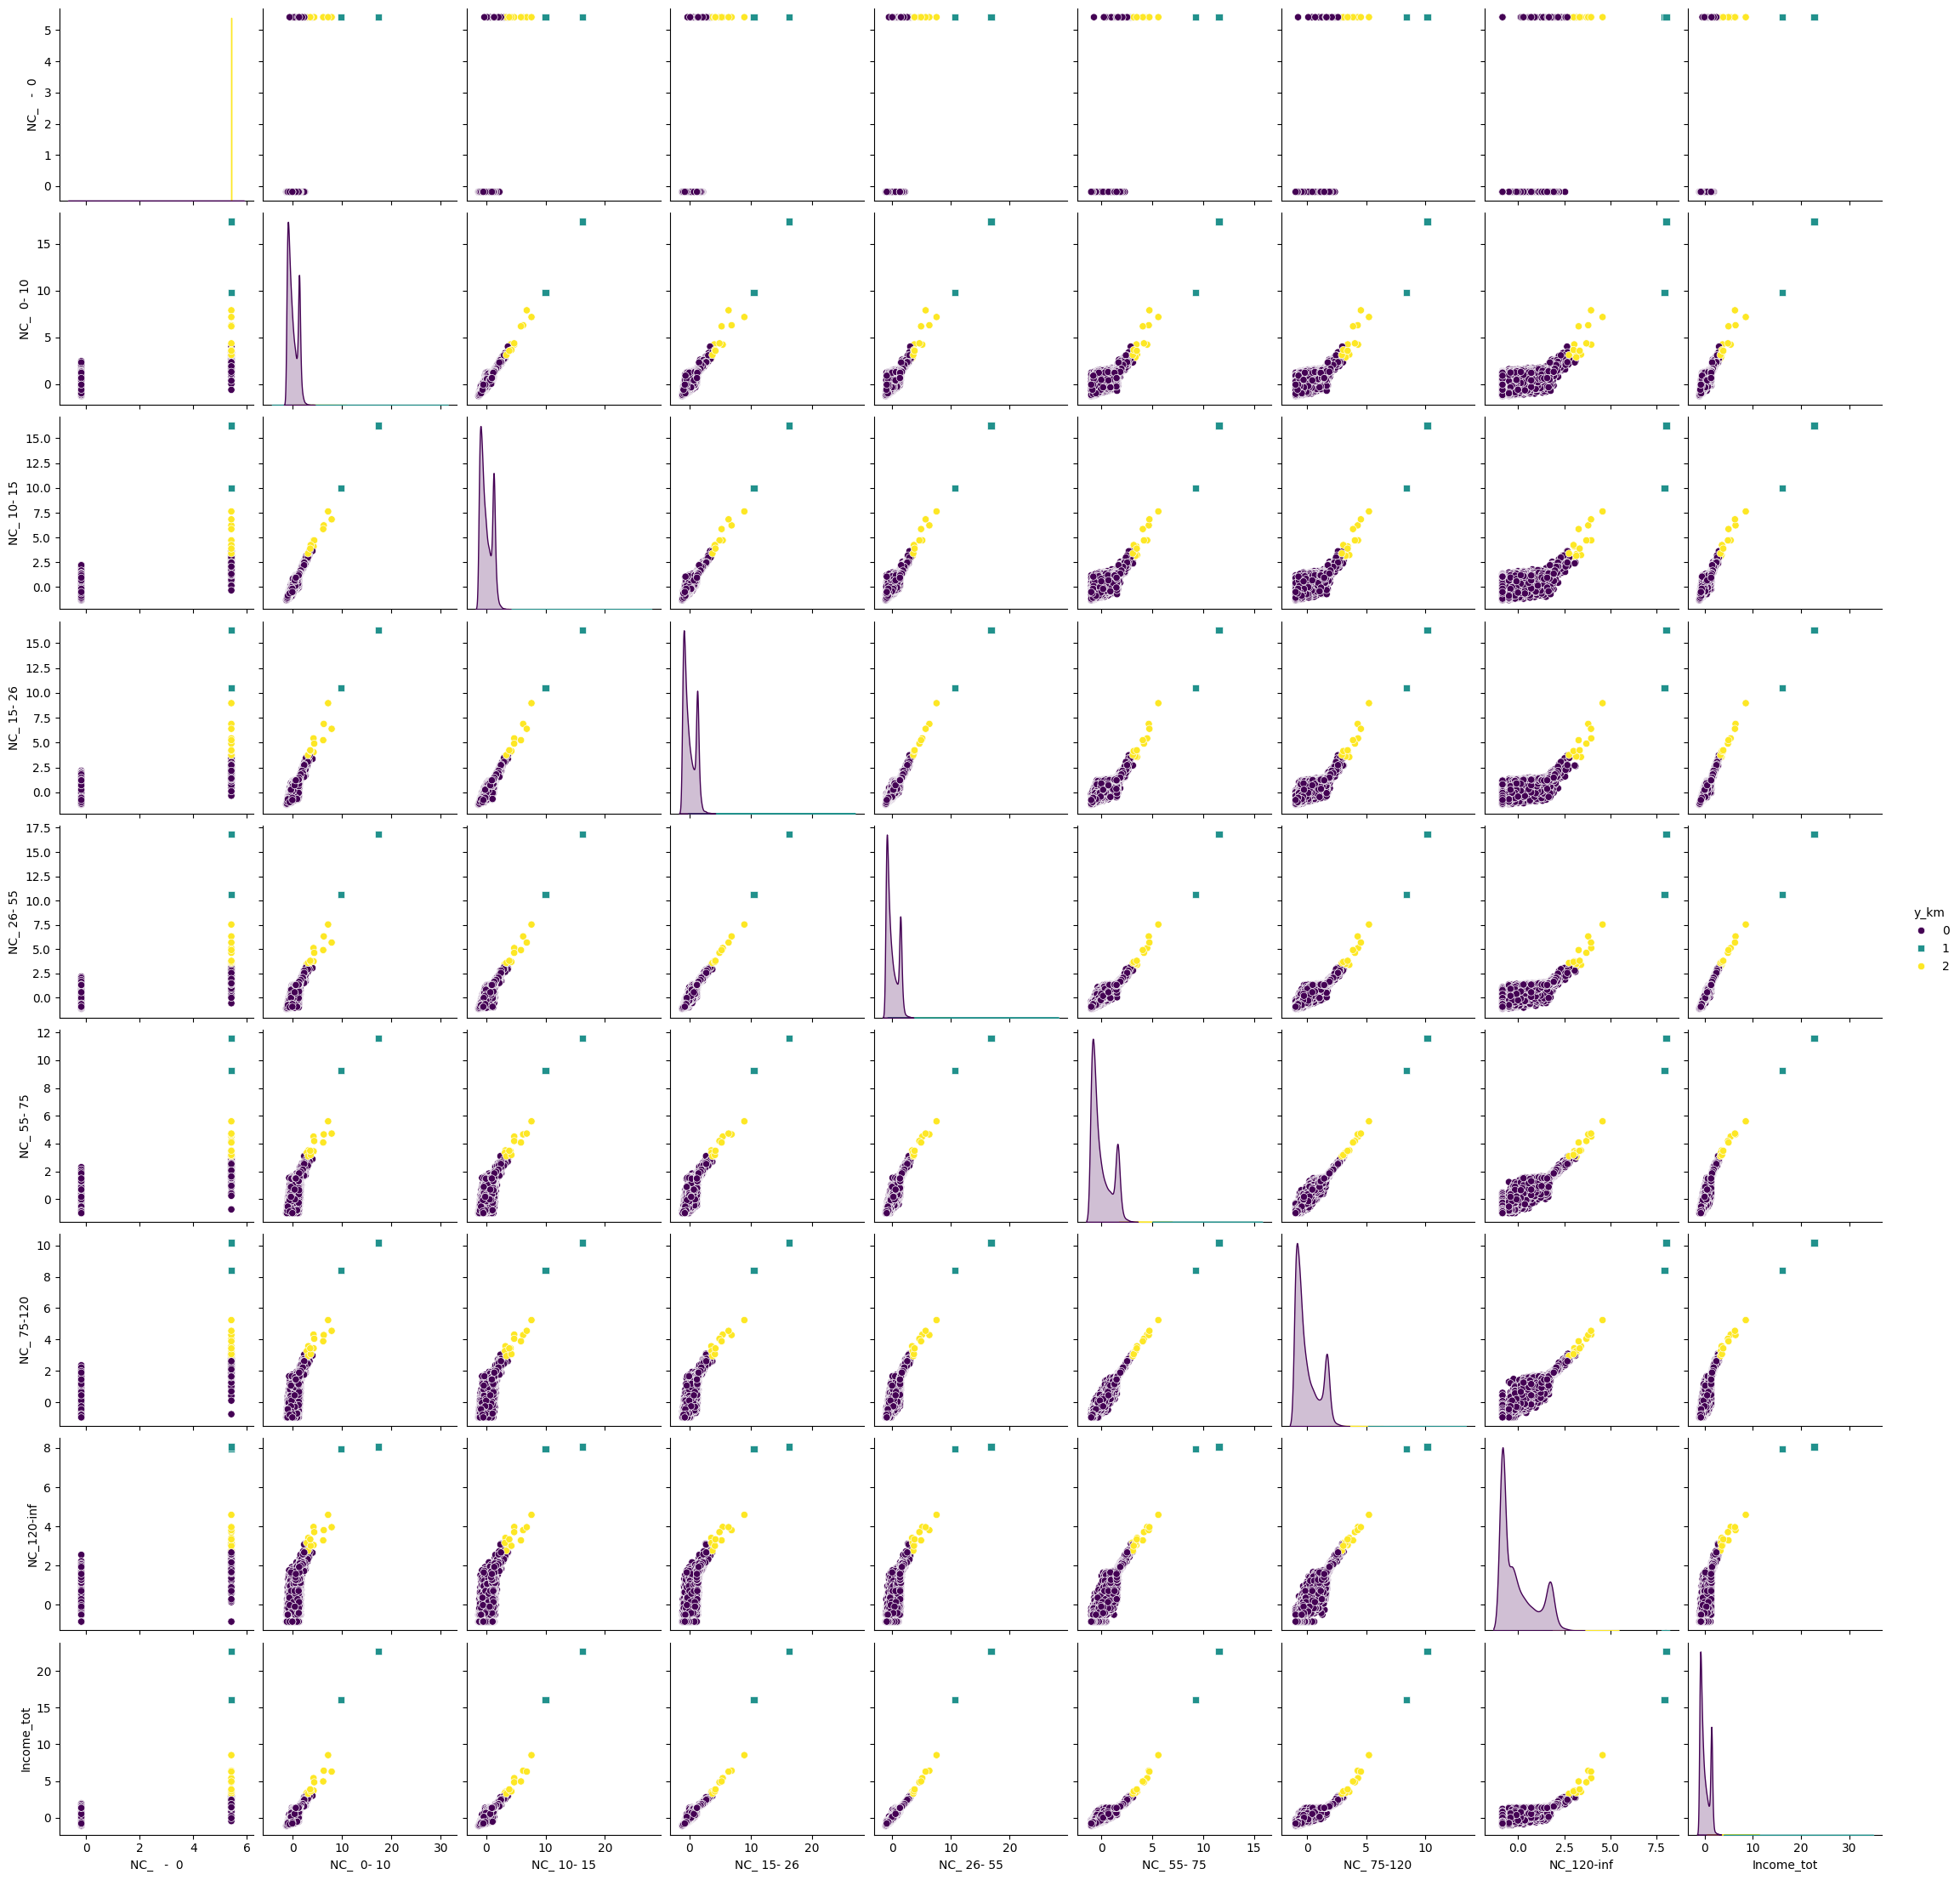

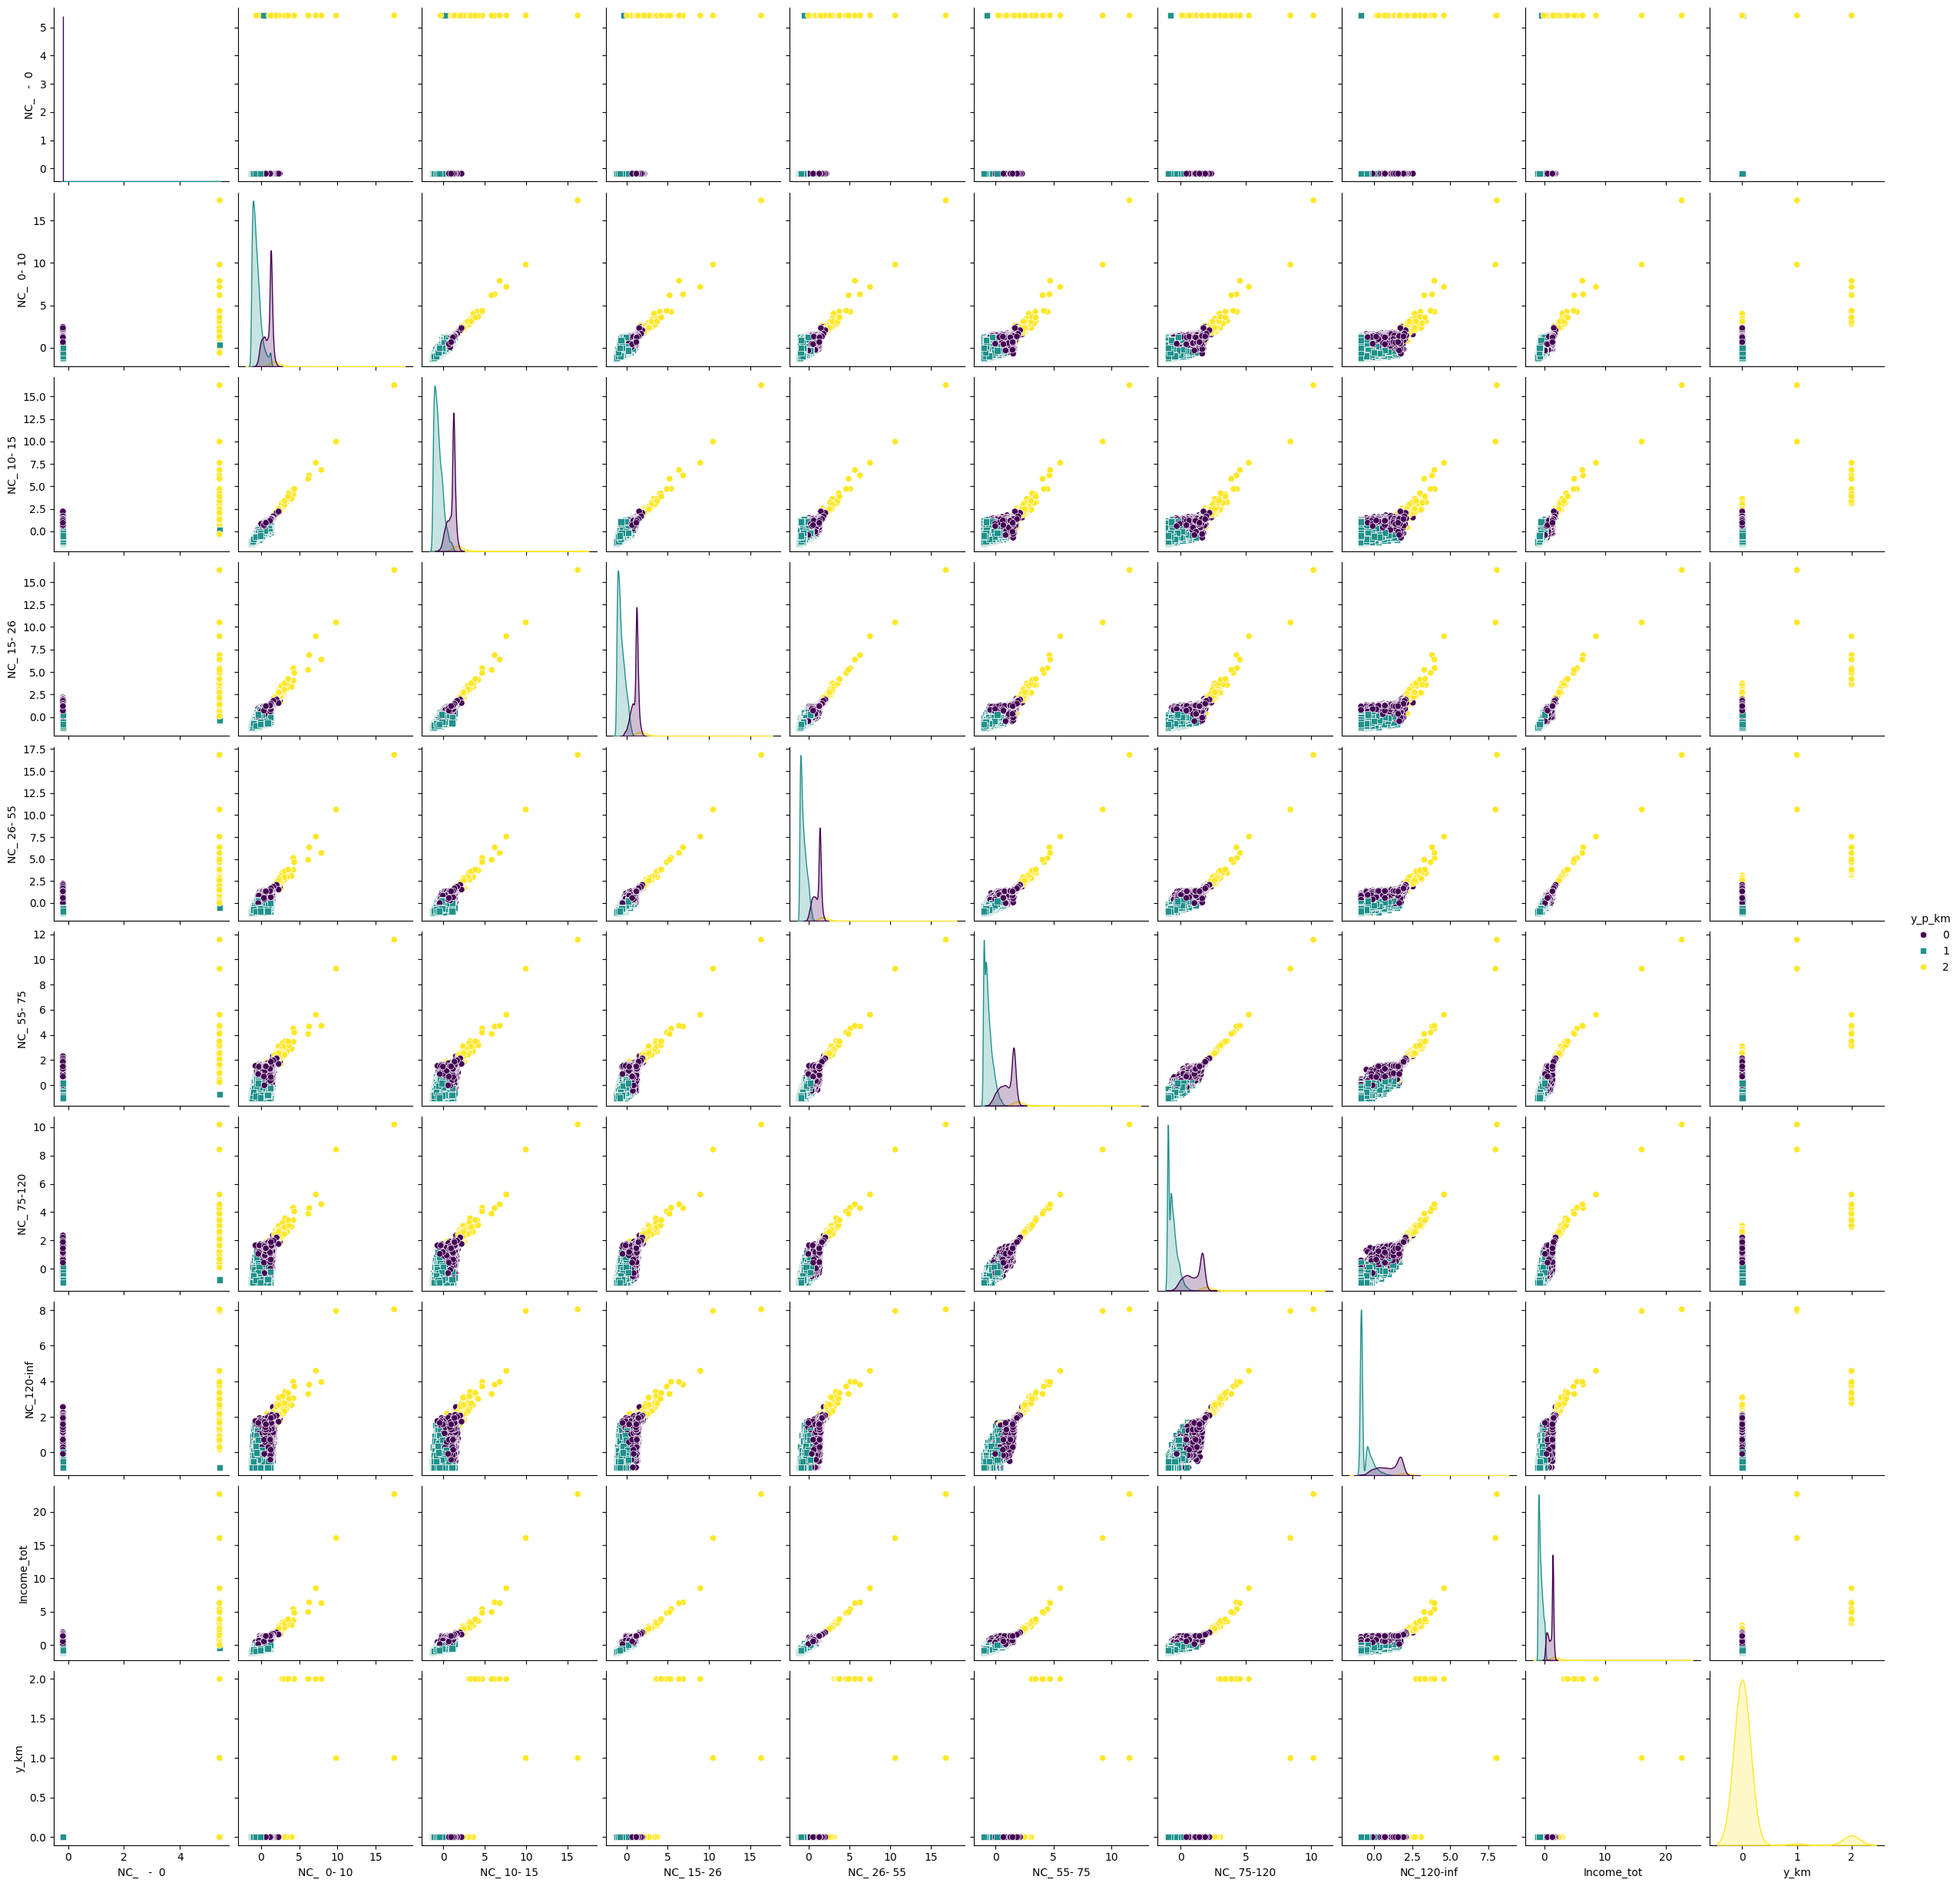

In [13]:
X_t = X_p # Copy of standardized dataset
 
## SAME STANDARDIZED DATASET ##################################################################
X_p['y_km'] = y_km
sns.pairplot(X_p, hue='y_km', palette='viridis', markers=['o', 's'])

X_t['y_p_km'] = y_p_km
sns.pairplot(X_t, hue='y_p_km', palette='viridis', markers=['o', 's'])

## EACH CLUSTERING TO EACH DATASET ################################################
# Plotting the pair plot for Clustering Scheme 1
# X['y_km'] = y_km
# sns.pairplot(X, hue='y_km', palette='viridis', markers=['o', 's'])

# Plotting the pair plot for Clustering Scheme 2
# X_p['y_p_km'] = y_p_km
# sns.pairplot(X_p, hue='y_p_km', palette='viridis', markers=['o', 's'])

I would choose the second clustering schema because the clusters are more balanced.